In [1]:
import featuretools as ft
import numpy as np
import pandas as pd

train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")

In [2]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
# saving identifiers
test_Item_Identifier = test['Item_Identifier']
test_Outlet_Identifier = test['Outlet_Identifier']
sales = train['Item_Outlet_Sales']
train.drop(['Item_Outlet_Sales'], axis=1, inplace=True)

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


In [7]:
combi = train.append(test, ignore_index=True)

In [8]:
combi.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
# imputing missing data
combi['Item_Weight'].fillna(combi['Item_Weight'].mean(), inplace = True)
combi['Outlet_Size'].fillna("missing", inplace = True)

In [10]:
combi['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [11]:
# dictionary to replace the categories
fat_content_dict = {'Low Fat':0, 'Regular':1, 'LF':0, 'reg':1, 'low fat':0}

combi['Item_Fat_Content'] = combi['Item_Fat_Content'].replace(fat_content_dict, regex=True)

In [12]:
combi['Item_Identifier'].value_counts() , combi['Outlet_Identifier'].value_counts()

(NCI54    10
 FDT51    10
 FDP15    10
 NCM18    10
 FDR12    10
          ..
 FDS22     7
 FDM10     7
 DRN11     7
 NCL42     7
 FDX49     7
 Name: Item_Identifier, Length: 1559, dtype: int64,
 OUT027    1559
 OUT013    1553
 OUT046    1550
 OUT035    1550
 OUT049    1550
 OUT045    1548
 OUT018    1546
 OUT017    1543
 OUT010     925
 OUT019     880
 Name: Outlet_Identifier, dtype: int64)

In [13]:
combi['id'] = combi['Item_Identifier'] + combi['Outlet_Identifier']
combi.drop(['Item_Identifier'], axis=1, inplace=True)

In [15]:
train.shape

(8523, 11)

In [16]:
test.shape

(5681, 11)

In [17]:
combi.shape

(14204, 11)

In [18]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Fat_Content           14204 non-null  int64  
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  object 
 8   Outlet_Location_Type       14204 non-null  object 
 9   Outlet_Type                14204 non-null  object 
 10  id                         14204 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.2+ MB


In [19]:
categorical_features = np.where(combi.dtypes == 'object')[0]
categorical_features

array([ 3,  5,  7,  8,  9, 10], dtype=int64)

In [29]:
for i in categorical_features:
    print(" Unique values in", combi.columns[i], ":",combi.iloc[:,i].nunique()) 
    

 Unique values in Item_Type : 16
 Unique values in Outlet_Identifier : 10
 Unique values in Outlet_Size : 4
 Unique values in Outlet_Location_Type : 3
 Unique values in Outlet_Type : 4
 Unique values in id : 14204


In [25]:
combi.columns[3]

'Item_Type'

In [32]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_features = combi.select_dtypes(include=numerics).columns
num_features

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

### Lets find out skewness in the numerical columns 

skew Item_Weight :  0.11130214402607956
kurt Item_Weight :  -0.8607458068897214
skew Item_Fat_Content :  0.6135798479262169
kurt Item_Fat_Content :  -1.6235197702188404
skew Item_Visibility :  1.1950489584107384
kurt Item_Visibility :  1.8190084548869292
skew Item_MRP :  0.13071455455227582
kurt Item_MRP :  -0.893963773474292
skew Outlet_Establishment_Year :  -0.39642332052631185
kurt Outlet_Establishment_Year :  -1.2058651215276752


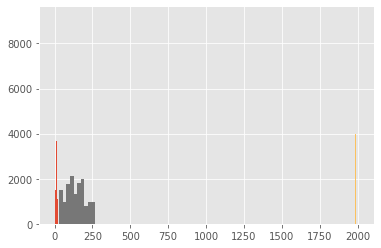

In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew

import matplotlib.pyplot as plt

for i in num_features:
#    plt.style.use('ggplot')
    data = combi[i]
 #   np.var(data)

#    plt.hist(data, bins=10)

#    print("mean", i,": ", np.mean(data))
#    print("var"  , i,": ", np.var(data))
    print("skew" , i,": ",skew(data))
    print("kurt", i,": " ,kurtosis(data))

In [43]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import boxcox

import matplotlib.pyplot as plt

for i in num_features:
    data = np.sqrt(combi[i])
    print("skew" , i,": ",skew(data))
    print("kurt", i,": " ,kurtosis(data))

skew Item_Weight :  -0.19017977758107998
kurt Item_Weight :  -0.8019706484559994
skew Item_Fat_Content :  0.6135798479262169
kurt Item_Fat_Content :  -1.6235197702188404
skew Item_Visibility :  -0.09674806036220486
kurt Item_Visibility :  -0.0009360343419668737
skew Item_MRP :  -0.27862016247292276
kurt Item_MRP :  -0.7921197109640001
skew Outlet_Establishment_Year :  -0.3984239020800498
kurt Outlet_Establishment_Year :  -1.2055164562905867


In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import boxcox

import matplotlib.pyplot as plt

for i in num_features:
    data = np.sqrt(combi[i])
    data = np.where(combi[i]<=0,0,boxcox(combi[i])[0])
    print("skew" , i,": ",skew(data))
    print("kurt", i,": " ,kurtosis(data))

skew Item_Weight :  -0.0730223300361668
kurt Item_Weight :  -0.8464282440050996


ValueError: Data must be positive.

In [42]:
combi[num_features].describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.353351,0.065953,141.004977,1997.830681
std,4.234226,0.478027,0.051459,62.086938,8.371664
min,4.555000,0.000000,0.000000,31.290000,1985.000000
25%,9.300000,0.000000,0.027036,94.012000,1987.000000
50%,12.792854,0.000000,0.054021,142.247000,1999.000000
75%,16.000000,1.000000,0.094037,185.855600,2004.000000
max,21.350000,1.000000,0.328391,266.888400,2009.000000


In [64]:
num_feats = combi.dtypes[combi.dtypes!='object'].index
num_feats =['Item_Weight',  'Item_Visibility', 'Item_MRP',  'Outlet_Establishment_Year']
skew_feats = combi[num_feats].skew().sort_values(ascending=False)
kurt_feats = combi[num_feats].kurtosis()
skewness = pd.DataFrame(({'Skew':skew_feats, 'Kurtosis':kurt_feats}))
skewness

,Skew,Kurtosis
Item_MRP,0.130728,-0.893856
Item_Visibility,1.195175,1.820071
Item_Weight,0.111314,-0.860626
Outlet_Establishment_Year,-0.396465,-1.205867


In [65]:
num_feats =['Item_Weight',  'Item_Visibility', 'Item_MRP',  'Outlet_Establishment_Year']

In [84]:
sqrt_feats = combi[num_feats]**(.5)
cubrt_feats = combi[num_feats]**(1/3)
log_feats = np.log(combi[num_feats])
inv_feats = 1/combi[num_feats]

from sklearn.preprocessing import MinMaxScaler
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(combi[num_feats])
# convert the array back to a dataframe
minmax_feats = pd.DataFrame(combi[num_feats])

from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
data = trans.fit_transform(combi[num_feats])
# convert the array back to a dataframe
std_feats = pd.DataFrame(combi[num_feats])

#skewness removal
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(combi[num_feats])
power=pd.DataFrame(X_power,columns=num_feats)

skewness['sqrt_feats'] = sqrt_feats.skew()
skewness['cubrt_feats'] = cubrt_feats.skew()
skewness['log_feats'] = log_feats.skew()
skewness['inv_feats'] = inv_feats.skew()
skewness['minmax_feats'] = minmax_feats.skew()
skewness['minmax_kurt'] = minmax_feats.kurtosis()
skewness['std_feats'] = std_feats.skew()
skewness['std_kurt'] = std_feats.kurtosis()
skewness['power_skew'] = power.skew()
skewness['power_kurt'] = power.kurtosis()

skewness

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


,Skew,Kurtosis,sqrt_feats,cubrt_feats,log_feats,inv_feats,minmax_feats,std_feats,minmax_kurt,std_kurt,power_skew,power_kurt
Item_MRP,0.130728,-0.893856,-0.278650,-0.425498,-0.731301,1.671754,0.130728,0.130728,-0.893856,-0.893856,-0.113637,-0.876636
Item_Visibility,1.195175,1.820071,-0.096758,-0.953269,NaN,NaN,1.195175,1.195175,1.820071,1.820071,0.121332,-0.829727
Item_Weight,0.111314,-0.860626,-0.190200,-0.294938,-0.509518,1.183444,0.111314,0.111314,-0.860626,-0.860626,-0.065230,-0.850403
Outlet_Establishment_Year,-0.396465,-1.205867,-0.398466,-0.399132,-0.400464,0.404449,-0.396465,-0.396465,-1.205867,-1.205867,-0.200960,-1.218392


### Scaling Doesnt impact skewness and kurtosis
## Power transformer most effectinve in redicucing the skewness

In [92]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
out_var=[]
for i in num_feats:
    sample_outliers = detect_outliers_iqr(combi[i])
    if len(sample_outliers)>0:
        print(i,'Contains outliers')
        out_var.append(i)
    else:
        print(i,'Does not contain outliers')
    #print("Outliers from IQR method for variable",i,": ", sample_outliers)
    
out_var

Item_Weight Does not contain outliers
Item_Visibility Contains outliers
Item_MRP Contains outliers
Outlet_Establishment_Year Contains outliers


['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

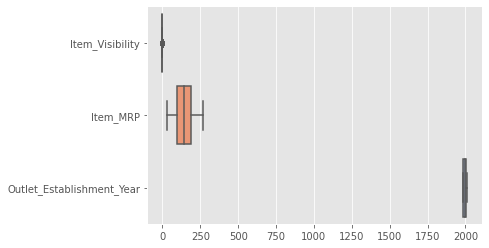

In [94]:
import seaborn as sns
ax = sns.boxplot(data=combi[out_var], orient="h", palette="Set2")

Item_Visibility Contains outliers
Item_MRP Contains outliers
Outlet_Establishment_Year Contains outliers


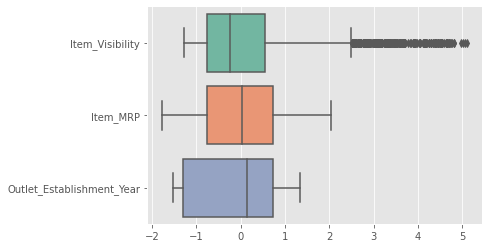

In [103]:
trans = StandardScaler()
data = trans.fit_transform(combi[out_var])
# convert the array back to a dataframe
std_feats = pd.DataFrame(data,columns=out_var)

for i in out_var:
    sample_outliers = detect_outliers_iqr(std_feats[i])
    if len(sample_outliers)>0:
        print(i,'Contains outliers')
        #out_var.append(i)
    else:
        print(i,'Does not contain outliers')
ax = sns.boxplot(data=std_feats, orient="h", palette="Set2")

In [139]:
from scipy import stats
z = []
zscore = pd.DataFrame()
for i in num_features:
    z=np.abs(stats.zscore(combi[i]))
    #print(z)
    #threshold=3
    #np.where(z>3, print('Outlier Varaible:',i),print('No Outlier variable',i))
    #print(i,"Outliers",np.where(z>3))
    #z =  pd.DataFrame(({'z-score%f'i:z}))
    zscore[i] = z
    #if z['z-score']>1:
    #    print(i)
(zscore.head())

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.824939,0.739212,0.969852,1.752511,0.139681
1,1.623224,1.352792,0.907063,1.493696,1.334228
2,1.111729,0.739212,0.956000,0.009874,0.139681
3,1.513233,1.352792,1.281712,0.661838,0.020226
4,0.912325,0.739212,1.281712,1.403623,1.293777


In [145]:
x = pd.DataFrame()
for i in zscore.columns:
    x[i] = np.where(zscore[i]>3,1,0)

In [147]:
if x=1:
    x.columns

SyntaxError: invalid syntax (<ipython-input-147-5dd3f033ffeb>, line 1)

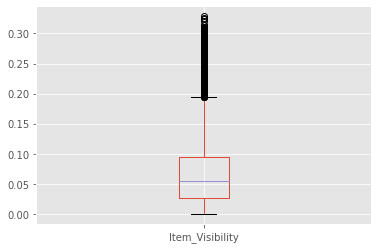

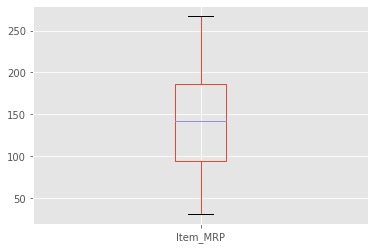

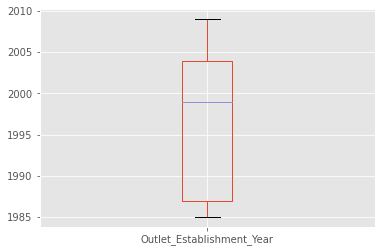

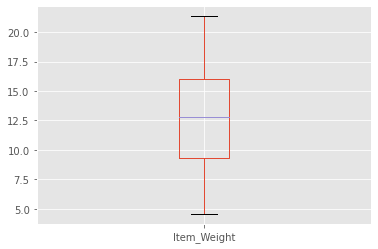

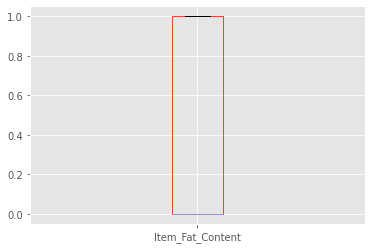

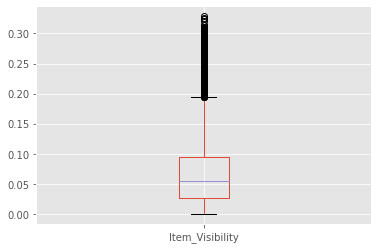

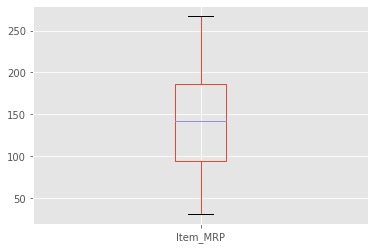

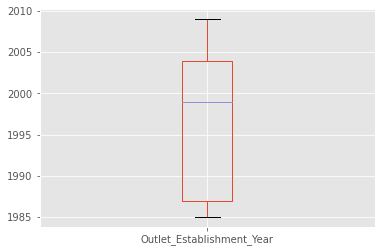

In [111]:
for i in out_var:
    combi.boxplot(column=i)
    plt.show()

In [ ]:
from scipy import stats

for i in out_var:
    z=np.abs(stats.zscore(combi[i]))
#print(z)
    threshold=3
    print(i,"Outliers",np.where(z>3))

### Outlier Grubbs test

In [149]:
import numpy as np
import scipy.stats as stats
x = np.array([12,13,14,19,21,23])
y = np.array([12,13,14,19,21,23,45])
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")

In [153]:
for i in num_feats:
    print("For",i)
    grubbs_test(combi[i])

For Item_Weight
Grubbs Calculated Value: 2.0210178948752864
Grubbs Critical Value: 4.6361986878998955
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

For Item_Visibility
Grubbs Calculated Value: 5.1001665576972695
Grubbs Critical Value: 4.6361986878998955
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers

For Item_MRP
Grubbs Calculated Value: 2.027606099865523
Grubbs Critical Value: 4.6361986878998955
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

For Outlet_Establishment_Year
Grubbs Calculated Value: 1.5326861394852864
Grubbs Critical Value: 4.6361986878998955
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers



## Detecting Columns that contain outlier

In [156]:
df = combi.select_dtypes(include=numerics)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df.columns[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=0)]

Index(['Item_Visibility'], dtype='object')

### Anaother method

In [157]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [158]:
out_iqr(df,'Item_Visibility')

The IQR is 0.067001571
The lower bound value is -0.073466674
The upper bound value is 0.19453961
Total number of outliers are 261


In [160]:
for i in num_feats:
    print(i)
    out_iqr(df,i)

Item_Weight
The IQR is 6.699999999999999
The lower bound value is -0.7499999999999982
The upper bound value is 26.049999999999997
Total number of outliers are 0
Item_Visibility
The IQR is 0.067001571
The lower bound value is -0.073466674
The upper bound value is 0.19453961
Total number of outliers are 261
Item_MRP
The IQR is 91.84360000000001
The lower bound value is -43.7534
The upper bound value is 323.621
Total number of outliers are 0
Outlet_Establishment_Year
The IQR is 17.0
The lower bound value is 1961.5
The upper bound value is 2029.5
Total number of outliers are 0


In [230]:
df1 = df.copy()
df1['Item_Visibility'] = np.where(df1['Item_Visibility'] >= 0.19453961,       0.19453961,
        np.where(df1['Item_Visibility'] <= -0.073466674,        -0.073466674,        df1['Item_Visibility']))

In [231]:
for i in num_feats:
    print(i)
    out_iqr(df1,i)

Item_Weight
The IQR is 6.699999999999999
The lower bound value is -0.7499999999999982
The upper bound value is 26.049999999999997
Total number of outliers are 0
Item_Visibility
The IQR is 0.067001571
The lower bound value is -0.073466674
The upper bound value is 0.19453961
Total number of outliers are 0
Item_MRP
The IQR is 91.84360000000001
The lower bound value is -43.7534
The upper bound value is 323.621
Total number of outliers are 0
Outlet_Establishment_Year
The IQR is 17.0
The lower bound value is 1961.5
The upper bound value is 2029.5
Total number of outliers are 0


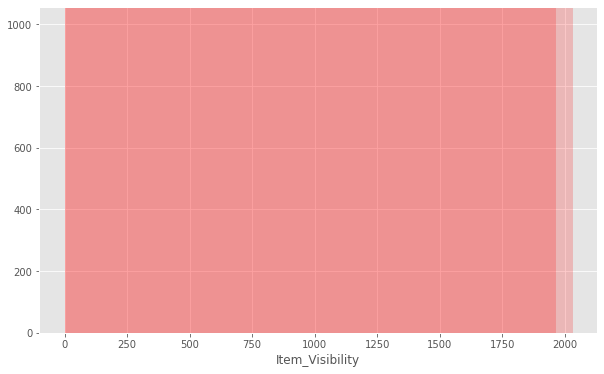

In [162]:
plt.figure(figsize = (10,6))
sns.distplot(df.Item_Visibility, kde=False)
plt.axvspan(xmin = lower,xmax= df.Item_Visibility.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.Item_Visibility.max(),alpha=0.2, color='red')

### WIth STD

In [163]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [164]:
for i in num_feats:
    print(i)
    out_std(df,i)

Item_Weight
The lower bound value is 0.09017549622102905
The upper bound value is 25.49553296106784
Total number of outliers are 0
Item_Visibility
The lower bound value is -0.08842300567127566
The upper bound value is 0.22032856581926258
Total number of outliers are 173
Item_MRP
The lower bound value is -45.255836784365414
The upper bound value is 327.2657913042185
Total number of outliers are 0
Outlet_Establishment_Year
The lower bound value is 1972.715689885482
The upper bound value is 2022.945673110857
Total number of outliers are 0


### Z Score Method

In [165]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [169]:
for i in num_feats:
    print(i)
    out_zscore(df[i])

Item_Weight
Total number of outliers are 0
Item_Visibility
Total number of outliers are 173
Item_MRP
Total number of outliers are 0
Outlet_Establishment_Year
Total number of outliers are 0


### Isolation Forest

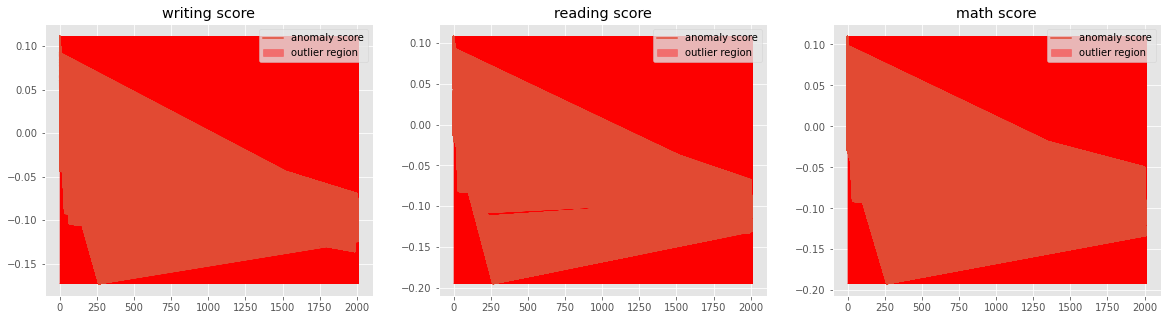

In [171]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns

#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df[num_feats].values.reshape(-1,1))

    xx = np.linspace(df[num_feats].min(), df[num_feats].max(), len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [172]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(df)

In [173]:
yhat

array([ 1, -1,  1, ...,  1,  1,  1])

In [176]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


In [177]:
data.shape

(10000,)

In [245]:
df3 =pd.DataFrame()
def Outliers(col_name, creditCardData):

    mean = creditCardData[col_name].mean()
    std = creditCardData[col_name].std()

    upper = mean + 3 * std
    lower = mean - 3 * std

    print('Upper bound: ', upper)
    print('Lower bound: ', lower, '\n')

    no_of_out_up = sum(creditCardData[col_name]>upper)
    no_of_out_lo = sum(creditCardData[col_name]<lower)

    print('No of outliers above upperbound: ', no_of_out_up)
    print('No of outliers below lowerbound: ', no_of_out_lo, '\n')

    print('Removing outliers____________\n')
    creditCardData[col_name][creditCardData[col_name]>upper] = upper
    creditCardData[col_name][creditCardData[col_name]<lower] = lower

    no_of_out_up = sum(creditCardData[col_name]>upper)
    no_of_out_lo = sum(creditCardData[col_name]<lower)


    print('No of outliers above upperbound: ', no_of_out_up)
    print('No of outliers below lowerbound: ', no_of_out_lo, '\n')
    df3[col_name] = creditCardData[col_name]
    return df3

In [226]:
for i in num_feats:
    print(i)

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year


In [213]:

upper_limit = df1['Item_Visibility'].quantile(0.99)
lower_limit = df1['Item_Visibility'].quantile(0.01)
df1['Item_Visibility'] = np.where(df1['Item_Visibility'] >= upper_limit,        upper_limit,
        np.where(df1['Item_Visibility'] <= lower_limit,        lower_limit,        df1['Item_Visibility']))

In [217]:
percentile25 = df1['Item_Visibility'].quantile(0.25)
percentile75 = df1['Item_Visibility'] .quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df1['Item_Visibility'] = np.where(df1['Item_Visibility'] >= upper_limit,        upper_limit,
        np.where(df1['Item_Visibility'] <= lower_limit,        lower_limit,        df1['Item_Visibility']))

In [ ]:
data.loc[data['Age']>=73,'Age']=73

In [246]:
df2=pd.DataFrame()
df1= df.copy()
for i in num_feats:
    print(i)
    df2 =(Outliers(i,df1))

Item_Weight
Upper bound:  25.49553296106784
Lower bound:  0.09017549622102905 

No of outliers above upperbound:  0
No of outliers below lowerbound:  0 

Removing outliers____________

No of outliers above upperbound:  0
No of outliers below lowerbound:  0 

Item_Visibility
Upper bound:  0.21424099265265967
Lower bound:  -0.0833482846936711 

No of outliers above upperbound:  194
No of outliers below lowerbound:  0 

Removing outliers____________

No of outliers above upperbound:  0
No of outliers below lowerbound:  0 

Item_MRP
Upper bound:  327.2657913042185
Lower bound:  -45.255836784365414 

No of outliers above upperbound:  0
No of outliers below lowerbound:  0 

Removing outliers____________

No of outliers above upperbound:  0
No of outliers below lowerbound:  0 

Outlet_Establishment_Year
Upper bound:  2022.945673110857
Lower bound:  1972.715689885482 

No of outliers above upperbound:  0
No of outliers below lowerbound:  0 

Removing outliers____________

No of outliers above 

In [247]:
df2

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.000000,182.0950,1998
4,8.93,0.000000,53.8614,1987
...,...,...,...,...
14199,10.50,0.013496,141.3154,1997
14200,7.60,0.142991,169.1448,2009
14201,10.00,0.073529,118.7440,2002
14202,15.30,0.000000,214.6218,2007


In [248]:
df2.columns[((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=0)]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 5

In [249]:
for i in num_feats:
    print(i)
    out_std(df2,i)

Item_Weight
The lower bound value is 0.09017549622102905
The upper bound value is 25.49553296106784
Total number of outliers are 0
Item_Visibility
The lower bound value is -0.08271122996449709
The upper bound value is 0.21344868649795523
Total number of outliers are 199
Item_MRP
The lower bound value is -45.255836784365414
The upper bound value is 327.2657913042185
Total number of outliers are 0
Outlet_Establishment_Year
The lower bound value is 1972.715689885482
The upper bound value is 2022.945673110857
Total number of outliers are 0


In [202]:

# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
b = np.where(b<tenth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0,0.016047,249.8092,1999
1,5.92,1,0.019278,48.2692,2009
2,17.50,0,0.016760,141.6180,1999
3,19.20,1,0.000000,182.0950,1998
4,8.93,0,0.000000,53.8614,1987


AttributeError: 'list' object has no attribute 'value_counts'

In [97]:
std_feats.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,14204.000000,14204.000000,14204.000000
mean,0.065953,141.004977,1997.830681
std,0.051459,62.086938,8.371664
min,0.000000,31.290000,1985.000000
25%,0.027036,94.012000,1987.000000
50%,0.054021,142.247000,1999.000000
75%,0.094037,185.855600,2004.000000
max,0.328391,266.888400,2009.000000


In [ ]:
train1 =  combi[:8523]
test1 = combi[8523:]

In [130]:
# importing pandas
import pandas as pd

# Creating new dataframe
initial_data = {'First_name': ['Ram', 'Mohan', 'Tina', 'Jeetu', 'Meera'], 
            'Last_name': ['Kumar', 'Sharma', 'Ali', 'Gandhi', 'Kumari'], 
            'Marks': [12, 52, 36, 85, 23] }

df = pd.DataFrame(initial_data, columns = ['First_name', 'Last_name', 
'Marks'])

# Generate result using pandas
result = []
for value in df["Marks"]:
    if value >= 33:
        result.append("Pass")
    elif value < 0 and value > 100:
        result.append("Invalid")
    else:
        result.append("Fail")
   
df["Result"] = result   
print(df)

  First_name Last_name  Marks Result
0        Ram     Kumar     12   Fail
1      Mohan    Sharma     52   Pass
2       Tina       Ali     36   Pass
3      Jeetu    Gandhi     85   Pass
4      Meera    Kumari     23   Fail


In [13]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'sales')

# adding a dataframe 
es.entity_from_dataframe(entity_id = 'bigmart', dataframe = combi, index = 'id')

Entityset: sales
  Entities:
    bigmart [Rows: 14204, Columns: 11]
  Relationships:
    No relationships

In [14]:
es.normalize_entity(base_entity_id='bigmart', new_entity_id='outlet', index = 'Outlet_Identifier', 
additional_variables = ['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

Entityset: sales
  Entities:
    bigmart [Rows: 14204, Columns: 7]
    outlet [Rows: 10, Columns: 5]
  Relationships:
    bigmart.Outlet_Identifier -> outlet.Outlet_Identifier

In [15]:
print(es)

Entityset: sales
  Entities:
    bigmart [Rows: 14204, Columns: 7]
    outlet [Rows: 10, Columns: 5]
  Relationships:
    bigmart.Outlet_Identifier -> outlet.Outlet_Identifier


In [16]:
feature_matrix, feature_names = ft.dfs(entityset=es, 
target_entity = 'bigmart', 
max_depth = 2, 
verbose = 1, 
n_jobs = 3)

Built 37 features
EntitySet scattered to 3 workers in 8 seconds                                                                          
Elapsed: 00:02 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [17]:
feature_matrix.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'outlet.Outlet_Establishment_Year',
       'outlet.Outlet_Size', 'outlet.Outlet_Location_Type',
       'outlet.Outlet_Type', 'outlet.COUNT(bigmart)',
       'outlet.MAX(bigmart.Item_Fat_Content)', 'outlet.MAX(bigmart.Item_MRP)',
       'outlet.MAX(bigmart.Item_Visibility)',
       'outlet.MAX(bigmart.Item_Weight)',
       'outlet.MEAN(bigmart.Item_Fat_Content)',
       'outlet.MEAN(bigmart.Item_MRP)', 'outlet.MEAN(bigmart.Item_Visibility)',
       'outlet.MEAN(bigmart.Item_Weight)',
       'outlet.MIN(bigmart.Item_Fat_Content)', 'outlet.MIN(bigmart.Item_MRP)',
       'outlet.MIN(bigmart.Item_Visibility)',
       'outlet.MIN(bigmart.Item_Weight)', 'outlet.MODE(bigmart.Item_Type)',
       'outlet.NUM_UNIQUE(bigmart.Item_Type)',
       'outlet.SKEW(bigmart.Item_Fat_Content)',
       'outlet.SKEW(bigmart.Item_MRP)', 'outlet.SKEW(bigmart.Item_Visibility)',
       'outlet.SKEW(bi

In [18]:
feature_matrix.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,outlet.Outlet_Establishment_Year,outlet.Outlet_Size,outlet.Outlet_Location_Type,outlet.Outlet_Type,...,outlet.SKEW(bigmart.Item_Visibility),outlet.SKEW(bigmart.Item_Weight),outlet.STD(bigmart.Item_Fat_Content),outlet.STD(bigmart.Item_MRP),outlet.STD(bigmart.Item_Visibility),outlet.STD(bigmart.Item_Weight),outlet.SUM(bigmart.Item_Fat_Content),outlet.SUM(bigmart.Item_MRP),outlet.SUM(bigmart.Item_Visibility),outlet.SUM(bigmart.Item_Weight)
id,,,,,,,,,,,,,,,,,,,,,
FDA15OUT049,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0.790782,0.099024,0.478027,62.144594,0.043924,4.650796,547,218802.9588,91.450099,19844.655
DRC01OUT018,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0.783017,0.102602,0.478308,62.022851,0.044489,4.650874,547,217987.3906,92.723425,19794.425
FDN15OUT049,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0.790782,0.099024,0.478027,62.144594,0.043924,4.650796,547,218802.9588,91.450099,19844.655
FDX07OUT010,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,...,0.776902,0.112759,0.479301,62.010835,0.073604,4.675070,330,130572.7618,94.293418,11768.655
NCD19OUT013,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,...,0.759033,0.104392,0.478213,62.140848,0.044005,4.650214,549,219172.4492,93.555174,19859.980


In [19]:
feature_matrix = feature_matrix.reindex(index=combi['id'])
feature_matrix = feature_matrix.reset_index()

### MOdel Building

In [20]:
from catboost import CatBoostRegressor

In [21]:
categorical_features = np.where(feature_matrix.dtypes == 'object')[0]

for i in categorical_features:
    feature_matrix.iloc[:,i] = feature_matrix.iloc[:,i].astype('str')

In [22]:
feature_matrix.drop(['id'], axis=1, inplace=True)
train = feature_matrix[:8523]
test = feature_matrix[8523:]

In [23]:
# removing uneccesary variables
train.drop(['Outlet_Identifier'], axis=1, inplace=True)
test.drop(['Outlet_Identifier'], axis=1, inplace=True)

In [25]:
# identifying categorical features
categorical_features = np.where(train.dtypes == 'object')[0]
categorical_features

array([ 3,  6,  7,  8, 22], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split

# splitting train data into training and validation set
xtrain, xvalid, ytrain, yvalid = train_test_split(train, sales, test_size=0.25, random_state=11)

In [29]:
model_cat = CatBoostRegressor(iterations=200, learning_rate=0.3, depth=6, eval_metric='RMSE', random_seed=7)

# training model
model_cat.fit(xtrain, ytrain, cat_features=categorical_features, use_best_model=True)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 1452.8590984	total: 20.7ms	remaining: 4.12s
1:	learn: 1299.1044258	total: 44.7ms	remaining: 4.42s
2:	learn: 1206.4313081	total: 66.1ms	remaining: 4.34s
3:	learn: 1147.9485392	total: 92.4ms	remaining: 4.53s
4:	learn: 1116.2629645	total: 115ms	remaining: 4.5s
5:	learn: 1094.1346113	total: 137ms	remaining: 4.44s
6:	learn: 1082.6767621	total: 164ms	remaining: 4.51s
7:	learn: 1077.1103816	total: 190ms	remaining: 4.55s
8:	learn: 1073.1205735	total: 212ms	remaining: 4.5s
9:	learn: 1069.6594792	total: 240ms	remaining: 4.57s
10:	learn: 1066.7326891	total: 262ms	remaining: 4.51s
11:	learn: 1066.0171874	total: 285ms	remaining: 4.47s
12:	learn: 1063.2888862	total: 310ms	remaining: 4.46s
13:	learn: 1063.2809422	total: 316ms	remaining: 4.2s
14:	learn: 1061.1235559	total: 334ms	remaining: 4.12s
15:	learn: 1058.1475726	total: 353ms	remaining: 4.06s
16:	learn: 1057.3021612	total: 366ms	remaining: 3.94s
17:	learn: 1056.2975498	total: 384ms	remaining: 3.88s
18:	learn: 1054.9213591	total: 405ms	

160:	learn: 905.6572809	total: 3.26s	remaining: 790ms
161:	learn: 904.6132141	total: 3.28s	remaining: 770ms
162:	learn: 903.7102607	total: 3.31s	remaining: 751ms
163:	learn: 902.5413397	total: 3.32s	remaining: 730ms
164:	learn: 901.7232842	total: 3.35s	remaining: 710ms
165:	learn: 900.0529571	total: 3.37s	remaining: 690ms
166:	learn: 899.1112622	total: 3.4s	remaining: 673ms
167:	learn: 898.4533338	total: 3.43s	remaining: 654ms
168:	learn: 896.0880976	total: 3.46s	remaining: 636ms
169:	learn: 895.0880412	total: 3.49s	remaining: 616ms
170:	learn: 894.0790482	total: 3.51s	remaining: 595ms
171:	learn: 891.9886768	total: 3.54s	remaining: 576ms
172:	learn: 891.2147958	total: 3.55s	remaining: 555ms
173:	learn: 890.3315929	total: 3.58s	remaining: 535ms
174:	learn: 888.6550888	total: 3.6s	remaining: 515ms
175:	learn: 888.2754247	total: 3.63s	remaining: 495ms
176:	learn: 887.5914245	total: 3.65s	remaining: 474ms
177:	learn: 887.3273748	total: 3.68s	remaining: 454ms
178:	learn: 886.8439708	total:

In [30]:
# validation score
model_cat.score(xvalid, yvalid)

0.5728788704354562

In [45]:
pred = model_cat.predict(test)

In [32]:
sub =pd.read_csv('sample_submission_8RXa3c6.csv')
sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 8523 to 14203
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Item_Weight                            5681 non-null   float64
 1   Item_Fat_Content                       5681 non-null   int64  
 2   Item_Visibility                        5681 non-null   float64
 3   Item_Type                              5681 non-null   object 
 4   Item_MRP                               5681 non-null   float64
 5   outlet.Outlet_Establishment_Year       5681 non-null   int64  
 6   outlet.Outlet_Size                     5681 non-null   object 
 7   outlet.Outlet_Location_Type            5681 non-null   object 
 8   outlet.Outlet_Type                     5681 non-null   object 
 9   outlet.COUNT(bigmart)                  5681 non-null   int64  
 10  outlet.MAX(bigmart.Item_Fat_Content)   5681 non-null   int64  
 11  

In [43]:
feature_matrix[8523:].head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,outlet.Outlet_Establishment_Year,outlet.Outlet_Size,outlet.Outlet_Location_Type,outlet.Outlet_Type,...,outlet.SKEW(bigmart.Item_Visibility),outlet.SKEW(bigmart.Item_Weight),outlet.STD(bigmart.Item_Fat_Content),outlet.STD(bigmart.Item_MRP),outlet.STD(bigmart.Item_Visibility),outlet.STD(bigmart.Item_Weight),outlet.SUM(bigmart.Item_Fat_Content),outlet.SUM(bigmart.Item_MRP),outlet.SUM(bigmart.Item_Visibility),outlet.SUM(bigmart.Item_Weight)
8523,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0.790782,0.099024,0.478027,62.144594,0.043924,4.650796,547,218802.9588,91.450099,19844.655000
8524,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,missing,Tier 2,Supermarket Type1,...,0.774783,0.106563,0.477922,62.295513,0.044152,4.655234,544,217561.3500,94.342210,19722.750000
8525,14.600000,0,0.099575,Others,241.7538,OUT010,1998,missing,Tier 3,Grocery Store,...,0.776902,0.112759,0.479301,62.010835,0.073604,4.675070,330,130572.7618,94.293418,11768.655000
8526,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,missing,Tier 2,Supermarket Type1,...,0.774783,0.106563,0.477922,62.295513,0.044152,4.655234,544,217561.3500,94.342210,19722.750000
8527,12.792854,1,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,...,0.774028,0.000000,0.478189,62.059660,0.044228,0.000000,551,219838.2488,94.075671,19944.059742


In [38]:
sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [46]:
sub['Item_Outlet_Sales'] = pred

In [53]:
sub.to_csv('sub_fe_catboost.csv', index=False)

In [49]:
sub.describe()

,Item_Outlet_Sales
count,5681.000000
mean,2217.791049
std,1400.735760
min,-382.764119
25%,1103.687728
50%,2104.299333
75%,3084.257148
max,7869.805779


In [50]:
sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [52]:
sub['Item_Outlet_Sales'] = np.where(sub['Item_Outlet_Sales']<0,0,sub['Item_Outlet_Sales'])